In [1]:
import sklearn
import os
import pickle
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
layers = np.arange(0,12)

In [3]:
y_labels = ['Token from primary object','Token from second object']
x_labels = ['Decoding primary object','Decoding secondary object','Decoding combination of both']

### Individual Tasks plots

<Figure size 640x480 with 0 Axes>

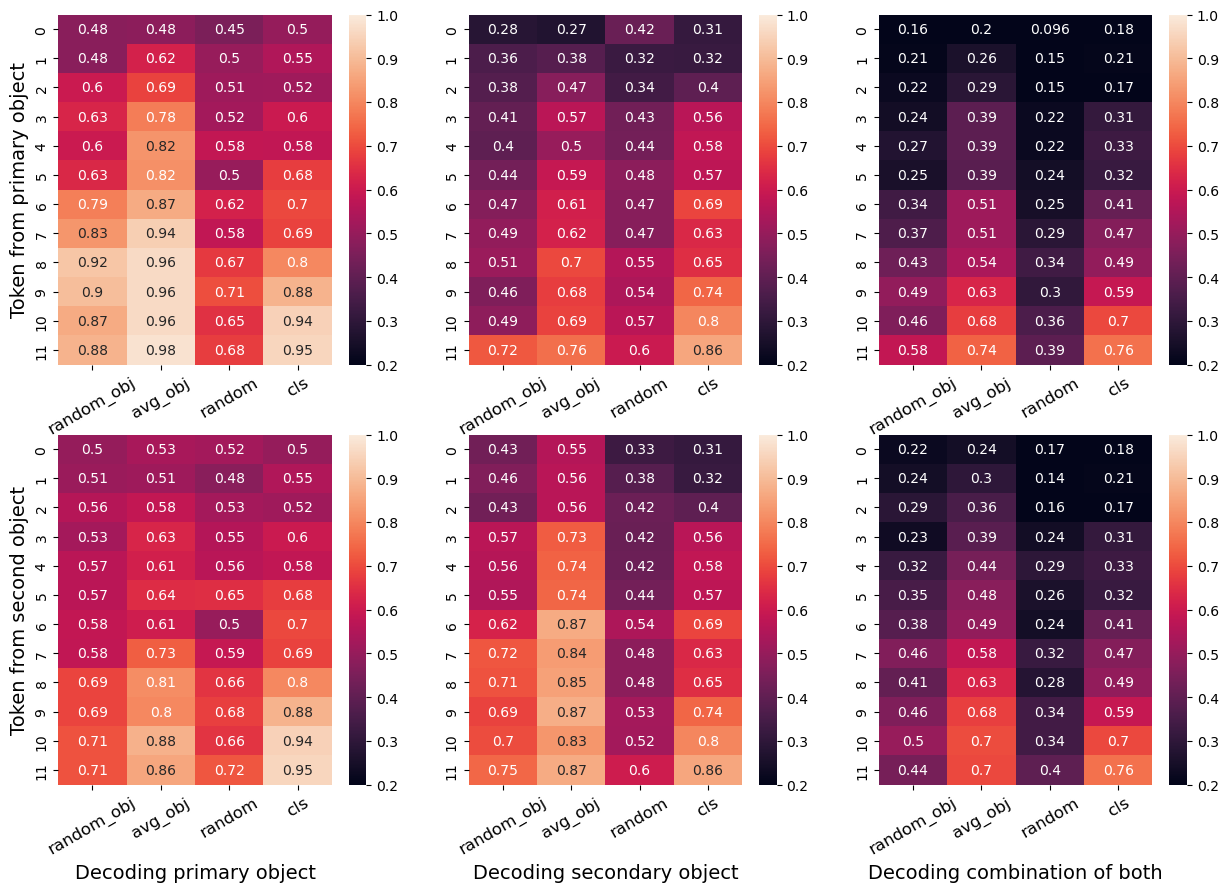

<Figure size 640x480 with 0 Axes>

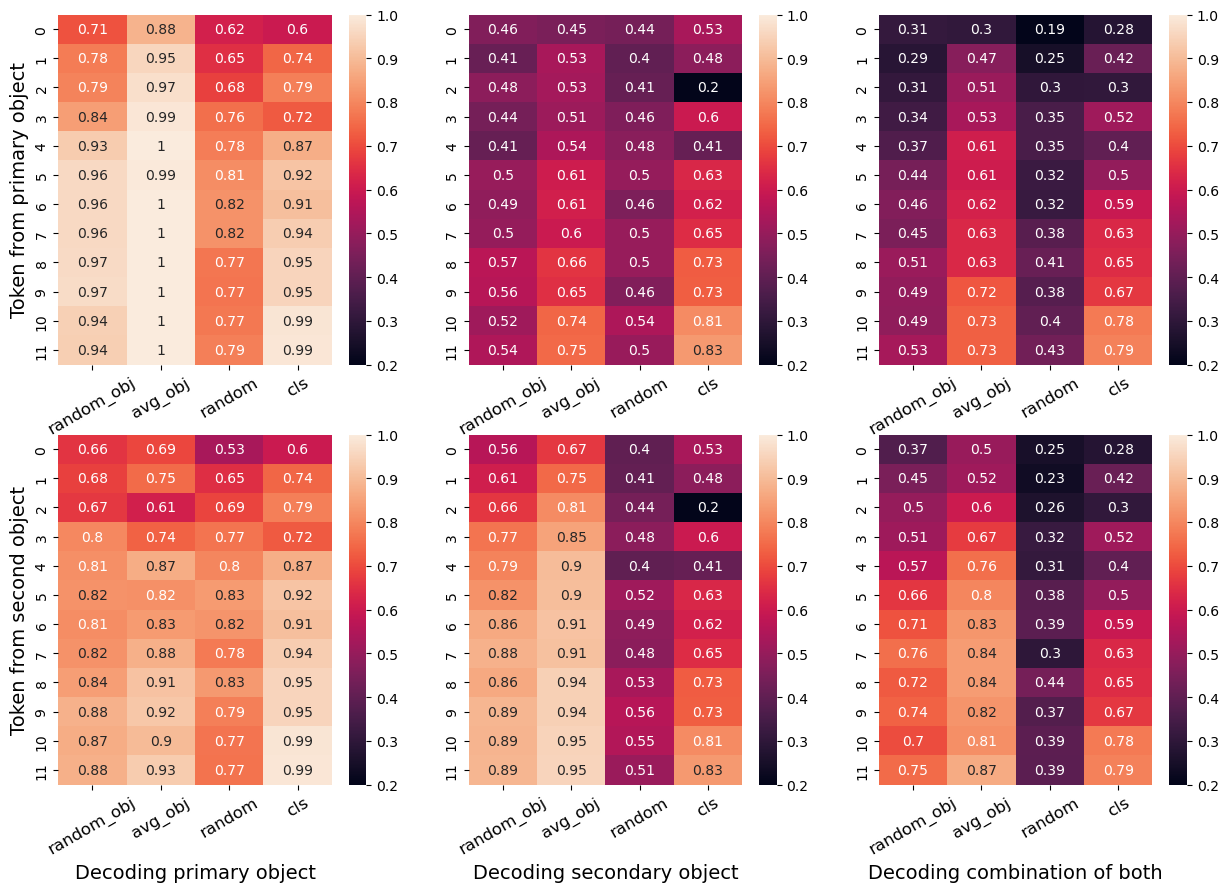

<Figure size 640x480 with 0 Axes>

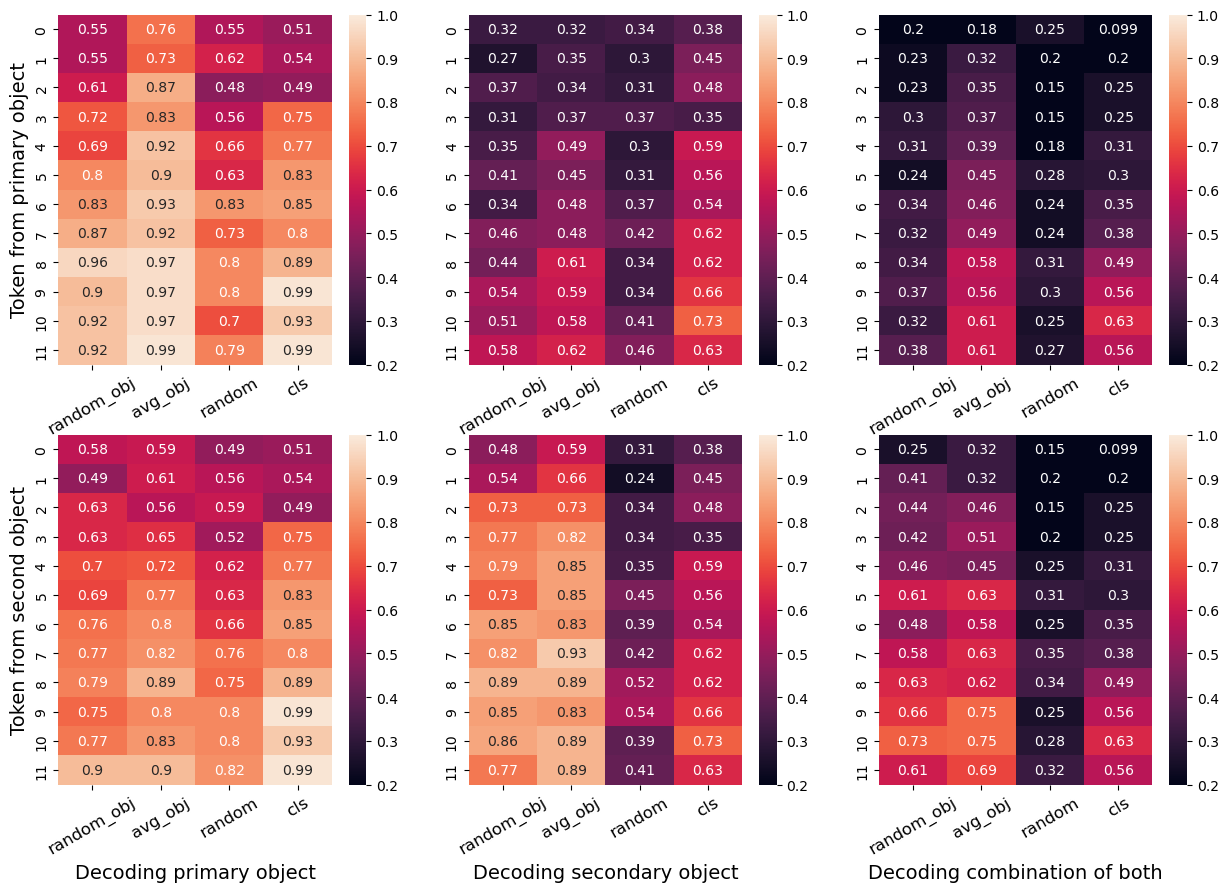

<Figure size 640x480 with 0 Axes>

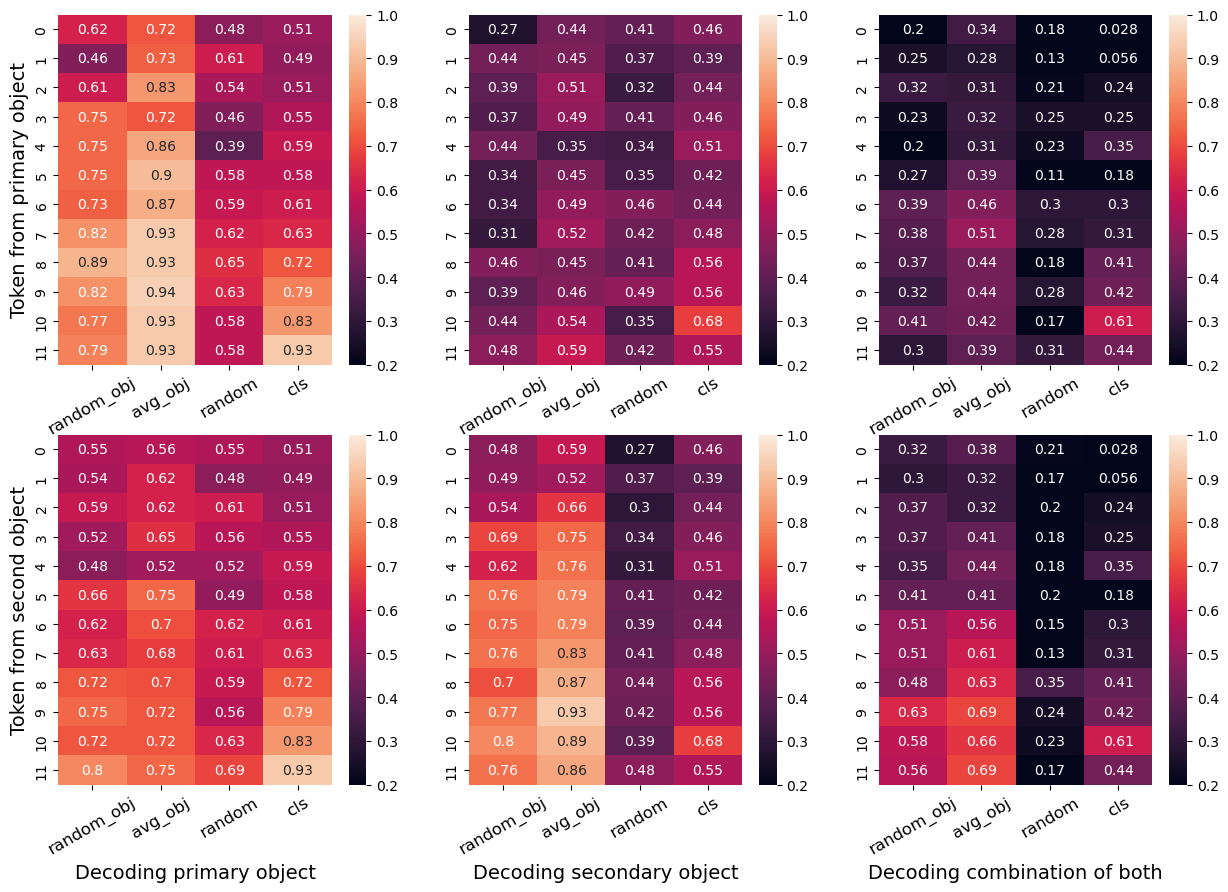

<Figure size 640x480 with 0 Axes>

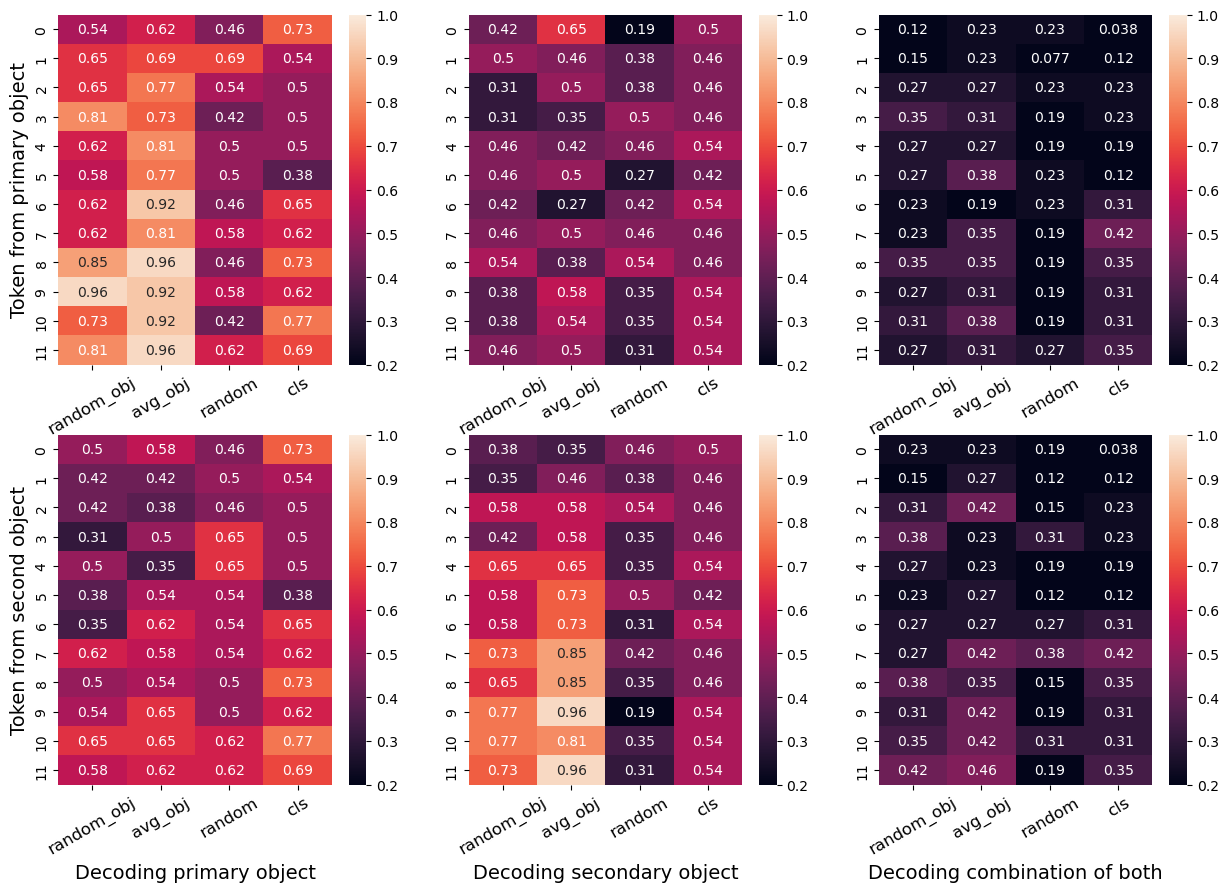

<Figure size 640x480 with 0 Axes>

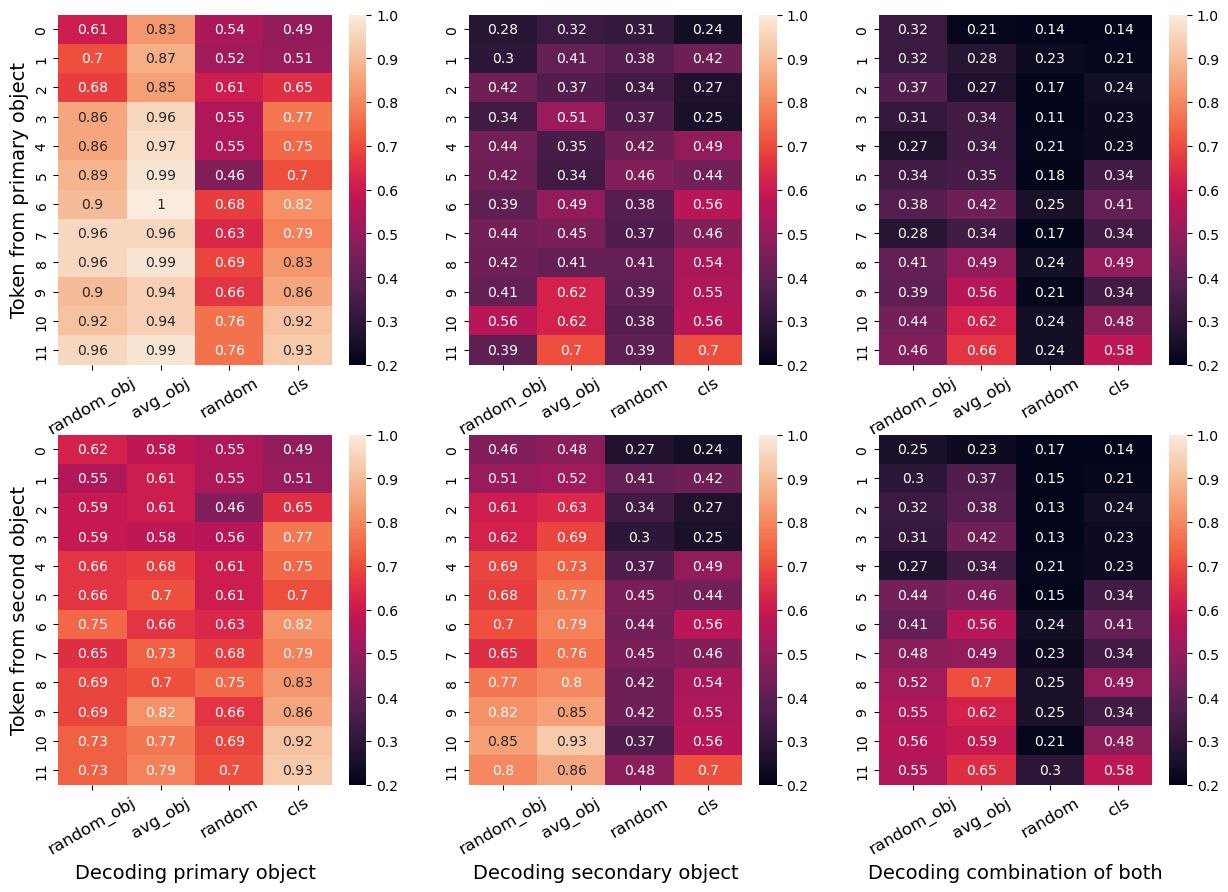

In [4]:
x_ticks = ['random_obj','avg_obj','random','cls']
feature_type = ['random_features','all_features','all_random','cls_features']
for task in range(6):
    plt.figure()
    with open('Results_Balanced_FLAVA/task{}_results.pkl'.format(task),'rb') as f:
        results = pickle.load(f)
    fig, axs = plt.subplots(2, 3,figsize=(15, 10))
    for x in [1,2]:
        for y in [1,2,3]:
            table = np.zeros((len(layers),len(feature_type)))
            for i,l in enumerate(layers):
                for j,f in enumerate(feature_type):
                    table[i,j]= results[l][f][x][y]
            sns.heatmap(table,annot=True,ax = axs[x-1,y-1],vmin=0.20,vmax=1,cmap='rocket')
            axs[x-1,y-1].set_xticklabels(x_ticks,rotation=30,fontsize = 12)
            axs[1,y-1].set_xlabel(x_labels[y-1],fontsize = 14)
            axs[x-1,0].set_ylabel(y_labels[x-1],fontsize = 14)

### Plot with average accuracy over the 6 tasks

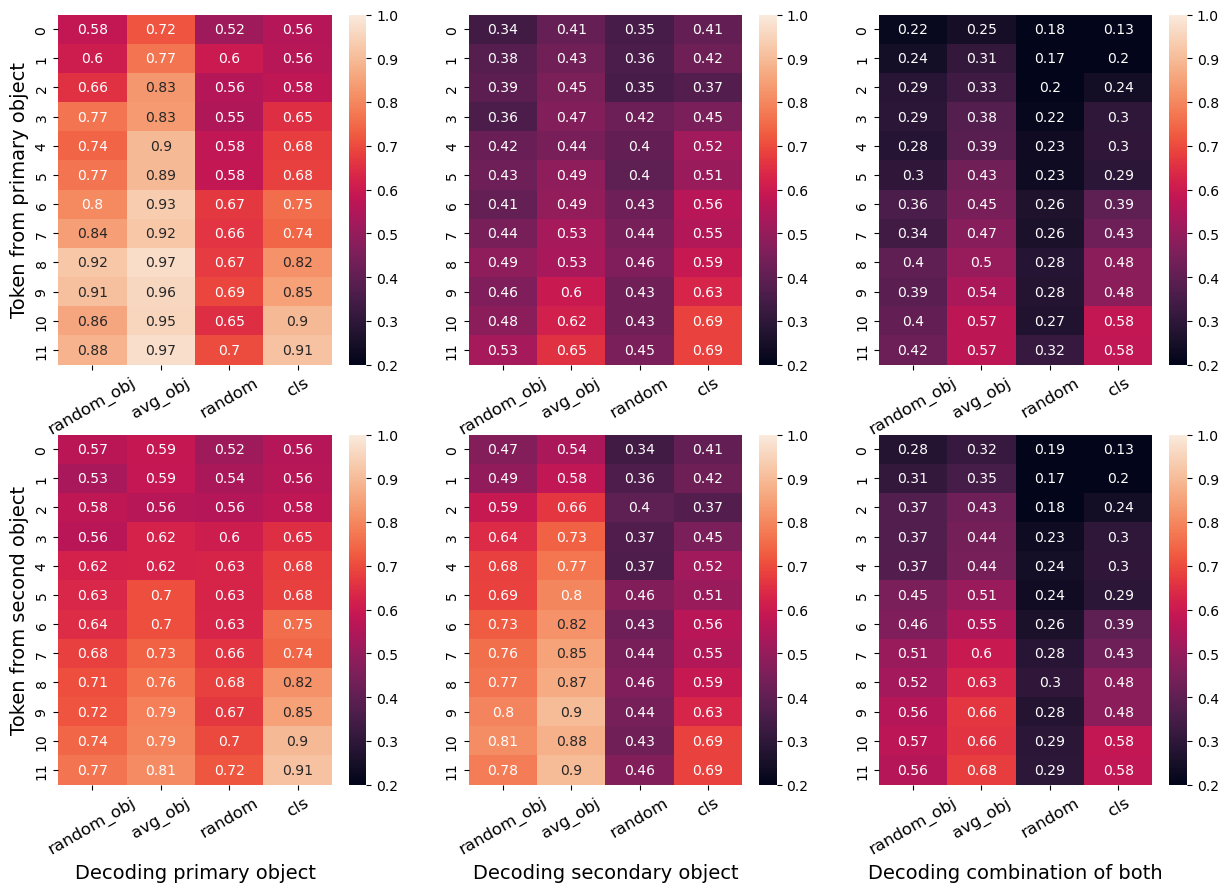

In [5]:
results= {}
for task in range(6):
    with open('Results_Balanced_FLAVA/task{}_results.pkl'.format(task),'rb') as f:
        results[task] = pickle.load(f)
fig, axs = plt.subplots(2, 3,figsize=(15, 10))
for x in [1,2]:
    for y in [1,2,3]:
        table = np.zeros((len(layers),len(feature_type)))
        for i,l in enumerate(layers):
            for j,f in enumerate(feature_type):
                for task in range(6):
                    table[i,j]= table[i][j]+results[task][l][f][x][y]
                table[i,j]/=6
        sns.heatmap(table,annot=True,ax = axs[x-1,y-1],vmin=0.20,vmax=1,cmap='rocket')
        axs[x-1,y-1].set_xticklabels(x_ticks,rotation=30,fontsize = 12)
        axs[1,y-1].set_xlabel(x_labels[y-1],fontsize = 14)
        axs[x-1,0].set_ylabel(y_labels[x-1],fontsize = 14)